# Kamień milowy 1(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

## Opis danych
Eksperyment został przeprowadzony na 30 ludziach. Każdy z nich wykonywał czynności: ['WALKING','WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']. W międzyczasie miał mierzone rózne parametry za pomocą akcelerometru('Acc') i żyroskopu('Gyro'). Znacznik na zmiennych 't' oznacza czas a 'f' częsotliwość. Mamy również w danych oznaczenia 'x', 'Y', 'Z'. Wskazują one kierunek, w którym poruszała się osoba. 

Wartości, które otrzymaliśmy z zmiennych to: 
* mean(): Mean value
* std(): Standard deviation
* mad(): Median absolute deviation 
* max(): Largest value in array
* min(): Smallest value in array
* sma(): Signal magnitude area
* energy(): Energy measure. Sum of the squares divided by the number of values. 
* iqr(): Interquartile range 
* entropy(): Signal entropy
* arCoeff(): Autorregresion coefficients with Burg order equal to 4
* correlation(): correlation coefficient between two signals
* maxInds(): index of the frequency component with largest magnitude
* meanFreq(): Weighted average of the frequency components to obtain a mean frequency
* skewness(): skewness of the frequency domain signal 
* kurtosis(): kurtosis of the frequency domain signal 
* bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
* angle(): Angle between to vectors.

## Wczytanie danych
Dane są od razu podzielone na zbiory treningowy i testowy. Teraz przeanalizujemy połączenie tych zbiorów.

In [307]:
features = list()
with open('UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('Number of Features: {}'.format(len(features)))


Number of Features: 561


In [308]:
X_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", 
                delim_whitespace=True, 
                header=None)
X_train.columns = [features]

# numer uczestnika   
X_train['subject'] = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', 
                                 header=None, 
                                 squeeze=True)


y_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', 
                      names=['Activity'], 
                      squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [309]:
X_test = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", 
                delim_whitespace=True, 
                header=None)
X_test.columns = [features]

# numer uczestnika   
X_test['subject'] = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', 
                                 header=None, 
                                 squeeze=True)


y_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', 
                      names=['Activity'], 
                      squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [310]:
data = pd.concat((train, test), axis=0)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [311]:
print(f'Number of duplicates in data: {sum(data.duplicated())}')
print(f'Number of nulls in data: {data.isnull().values.sum()}')

/home/krzysztof/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2886: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


Number of duplicates in data: 0
Number of nulls in data: 0


In [312]:
# zapisujemy utworzoną ramkę danych
data.to_csv('data.csv', index=False)

In [313]:
data = pd.read_csv("data.csv")
columns = data.columns # czemuś zwracało MultiIndex
data.columns = columns.to_list()
columns = data.columns
# czyszczenie nazw kolumn
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','_')

data.columns = columns
data.to_csv('data.csv', index=False)
data.head(2)

/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMean_gravity,angletBodyAccJerkMean_gravityMean,angletBodyGyroMean_gravityMean,angletBodyGyroJerkMean_gravityMean,angleX_gravityMean,angleY_gravityMean,angleZ_gravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [314]:
print(data.columns)

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMean_gravity', 'angletBodyAccJerkMean_gravityMean',
       'angletBodyGyroMean_gravityMean', 'angletBodyGyroJerkMean_gravityMean',
       'angleX_gravityMean', 'angleY_gravityMean', 'angleZ_gravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


## Analiza danych

In [3]:
# Wszystkie kolumny są standaryzowane oprócz "Subject" i "Activity" i "ActivityName". 
pd.set_option('max_columns', 20)
df = data.describe()
print(f"There is {sum(df.iloc[-1] > 1)} numeric columns, that have values > 1")
print(f"There is {sum(df.iloc[3] < -1)} numeric columns, that have values < -1")
df

There is 2 numeric columns, that have values > 1
There is 0 numeric columns, that have values < -1


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422,3.624624
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067,1.743695
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000,2.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000,4.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,6.000000


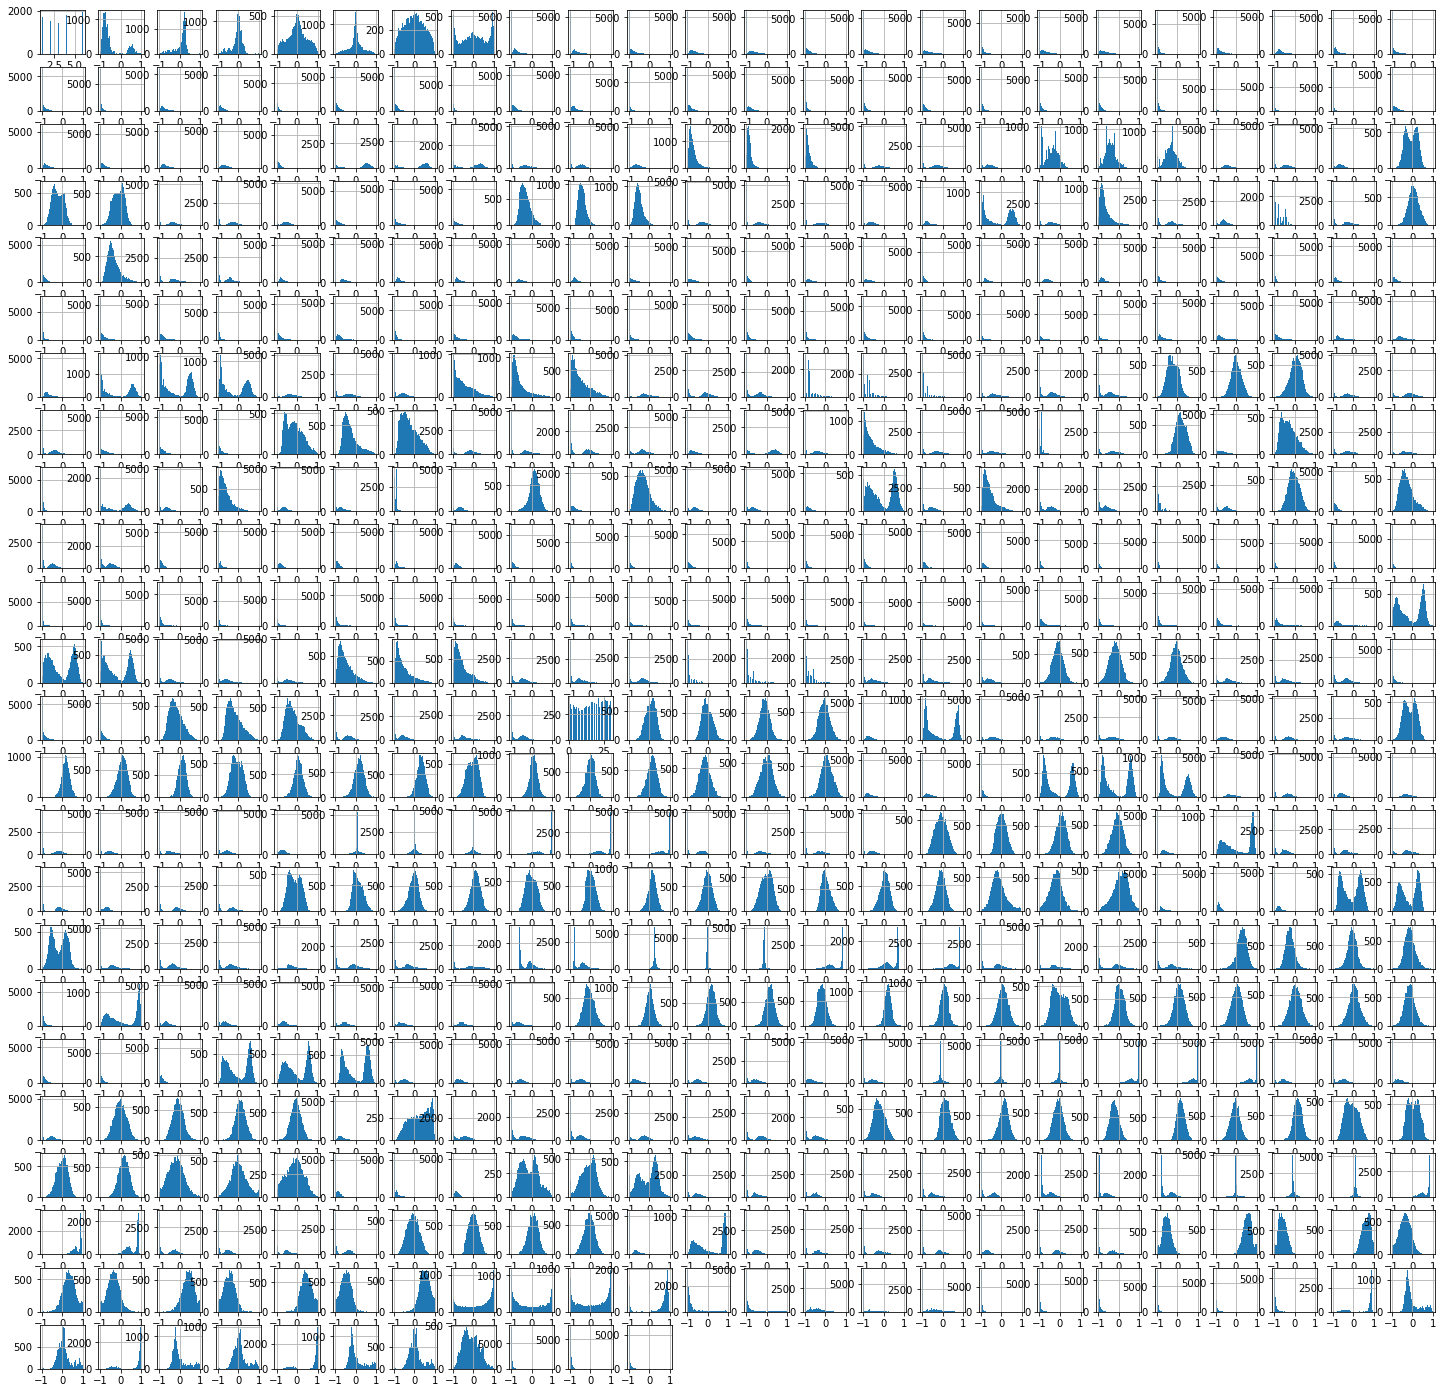

In [14]:
axarr = data.hist(figsize=(25,25), bins=45)
for ax in axarr.flatten():
    ax.set_xlabel("")
    ax.set_title("")
plt.show()
# jest dużo normalnych rozkładów
# trochę bimodalnych i lewostronnie skośnych

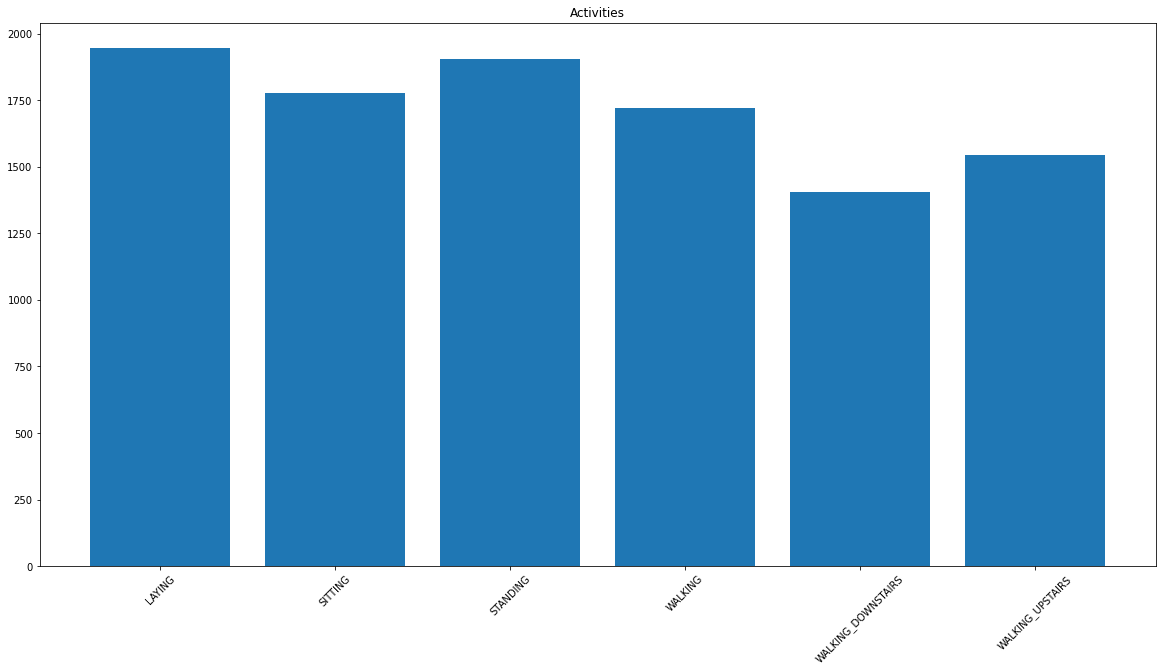

In [317]:
activities = data.groupby("ActivityName").size().reset_index(name="number")
plt.bar(activities["ActivityName"], height=activities["number"])
plt.title("Activities")
plt.xticks(rotation=45)
plt.show()
# mniej więcej tyle samo pomiarów dla każdej aktywności

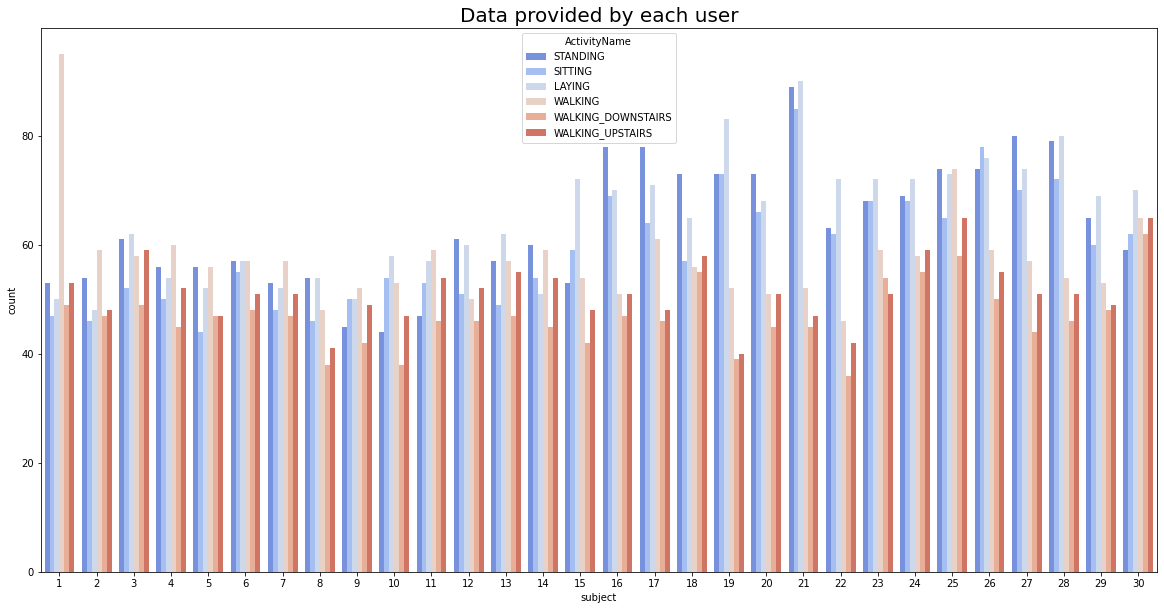

In [318]:
plt.figure(figsize=(20,10))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = data, palette="coolwarm")
plt.show()

Większość cech wyraźnie dzieli aktywności na statyczne i dynamiczne:

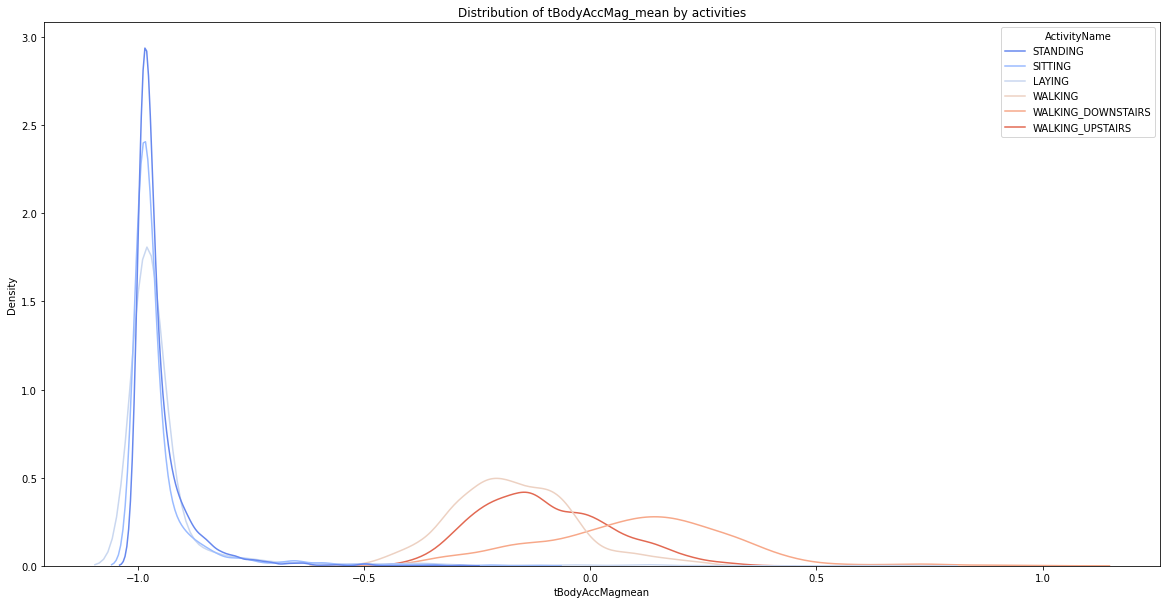

In [6]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=data, x="tBodyAccMagmean", hue="ActivityName", palette="coolwarm")
plt.title("Distribution of tBodyAccMag_mean by activities")
plt.show()
# tBodyAccMagmean(średnia z przyspieszenia ciała) dobrze rozdziela aktywności statyczne i dynamiczne

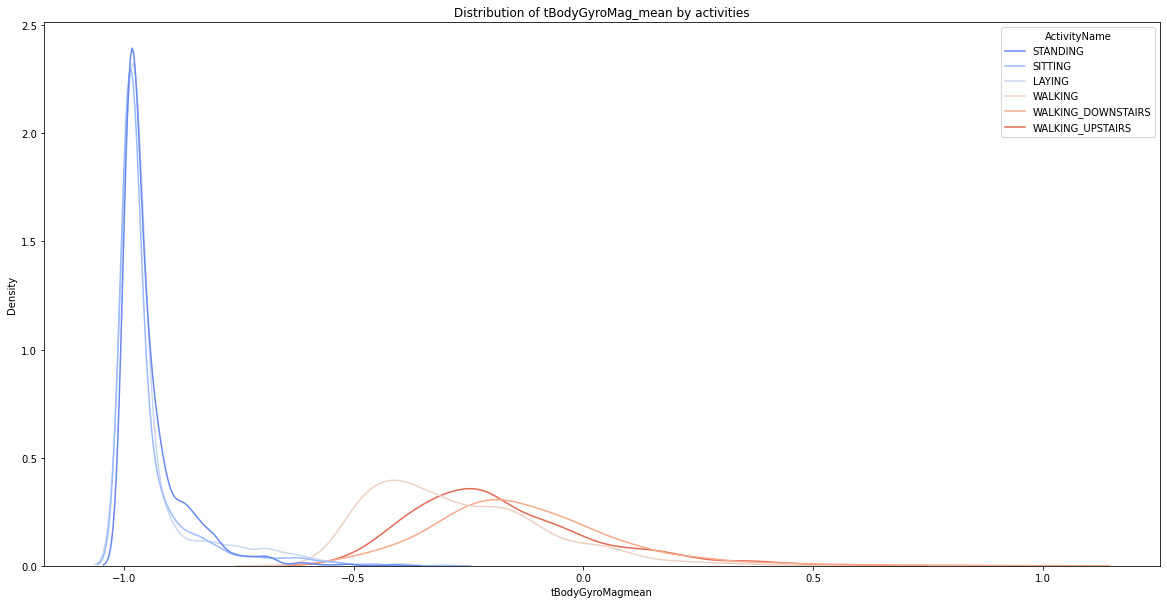

In [7]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=data, x="tBodyGyroMagmean", hue="ActivityName", palette="coolwarm")
plt.title("Distribution of tBodyGyroMag_mean by activities")
plt.show()

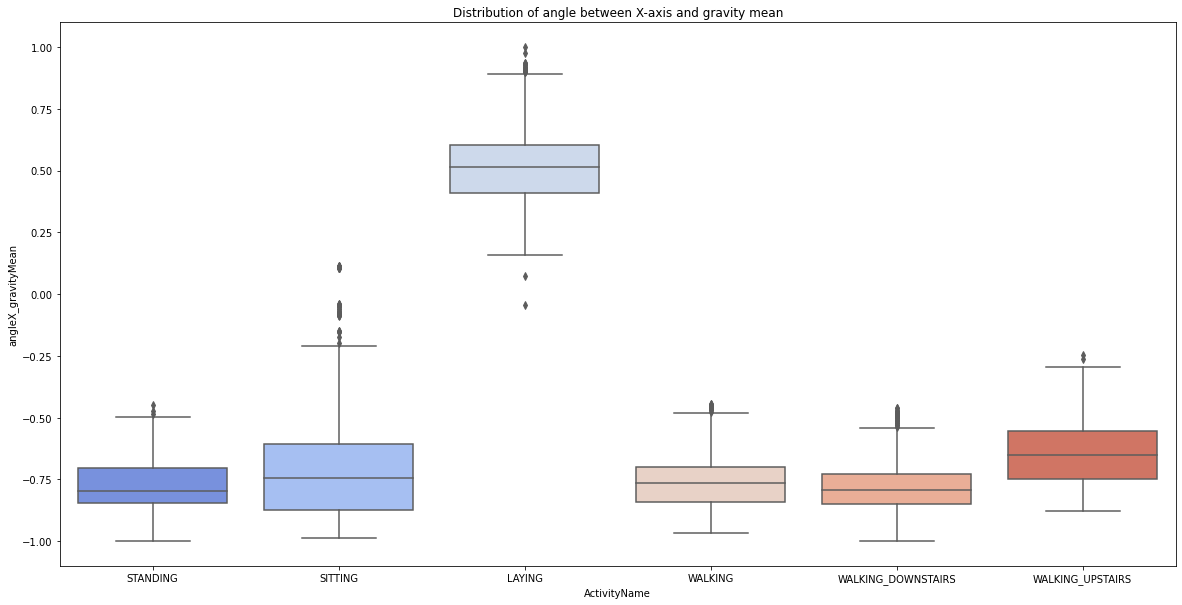

In [471]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="ActivityName", y="angleX_gravityMean", palette="coolwarm")
plt.title("Distribution of angle between X-axis and gravity mean")
plt.show()

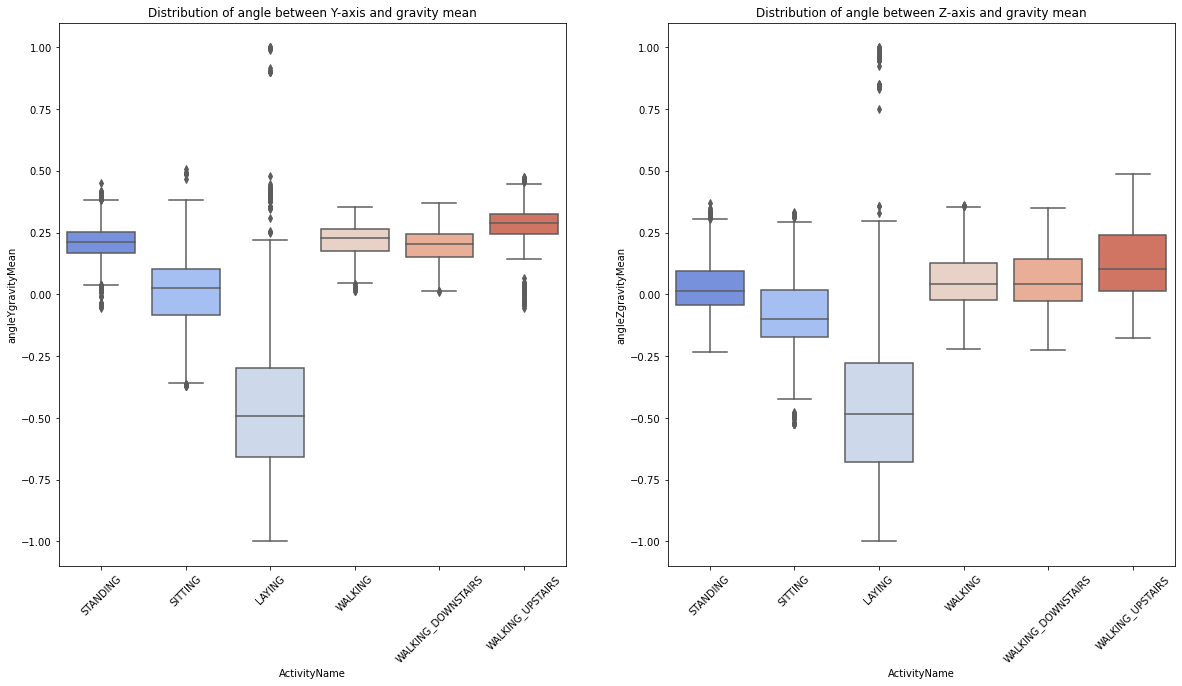

In [13]:
plt.rcParams["figure.figsize"] = [20,10]
fig, axes = plt.subplots(1, 2)
sns.boxplot(ax=axes[0], data=data, x="ActivityName", y="angleYgravityMean", palette="coolwarm")
sns.boxplot(ax=axes[1], data=data, x="ActivityName", y="angleZgravityMean", palette="coolwarm")
axes[0].set_title("Distribution of angle between Y-axis and gravity mean")
axes[1].set_title("Distribution of angle between Z-axis and gravity mean")
axes[0].tick_params(axis="x", labelrotation=45)
axes[1].tick_params(axis="x", labelrotation=45)
plt.show()
# inne współrzędne tak dobrze już nie rozdzielają

## Korelacje
W związku z tym, że mamy bardzo dużych zmiennych, postanowiliśmy przyjrzeć się, czy nie są one w jakiś sposób skorelowane. W związku z tym obliczyliśmy pomiędzy nimi korelacje Pearsona: 

In [326]:
# zobaczmy, czy są kolumny, które są silnie skorelowane
columns = data.columns[0:-3] # usuwam trzy ostatnie kolumny z niestandaryzowanymi danymi

correlation = pd.DataFrame()
i = 0 
j = 1
while i < data.shape[1]-3: 
    while j < data.shape[1]-3:
        if i == j:
            j += 1
            continue
        value = pd.DataFrame([[columns[i], columns[j], data[columns[i]].corr(data[columns[j]])]])
        correlation = correlation.append(value)
        j += 1
    i += 1
    j = i 
        
        
correlation.head()

,0,1,2
0,tBodyAcc_mean_X,tBodyAcc_mean_Y,0.128037
0,tBodyAcc_mean_X,tBodyAcc_mean_Z,-0.230302
0,tBodyAcc_mean_X,tBodyAcc_std_X,0.004590
0,tBodyAcc_mean_X,tBodyAcc_std_Y,-0.016785
0,tBodyAcc_mean_X,tBodyAcc_std_Z,-0.036071


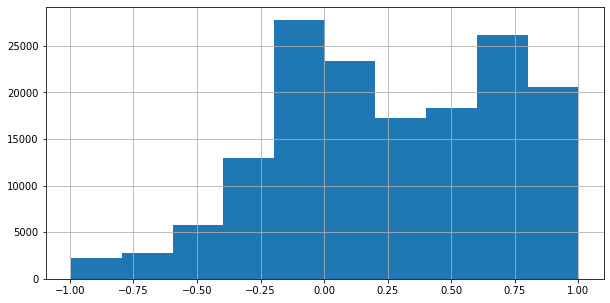

In [327]:
# Rozkład otrzymanych wyników:
plt.figure(figsize=(10,5))
correlation[2].hist()
plt.show()

Widzimy, że jest duża ilość zmiennych z wysokim współczynnikiem korelacji. 

In [334]:
# Zobaczmy, które zmienne są maksymalnie skorelowane: 
pd.set_option('max_rows', 20000)
correlation[(correlation[2] == 1)|(correlation[2] == -1 )]

,0,1,2
0,tBodyAccMag_mean,tBodyAccMag_sma,1.0
0,tBodyAccMag_mean,tGravityAccMag_mean,1.0
0,tBodyAccMag_mean,tGravityAccMag_sma,1.0
0,tBodyAccMag_mad,tGravityAccMag_mad,1.0
0,tBodyAccMag_max,tGravityAccMag_max,1.0
0,tBodyAccMag_min,tGravityAccMag_min,1.0
0,tBodyAccMag_sma,tGravityAccMag_mean,1.0
0,tBodyAccMag_sma,tGravityAccMag_sma,1.0
0,tBodyAccMag_iqr,tGravityAccMag_iqr,1.0
0,tBodyAccMag_entropy,tGravityAccMag_entropy,1.0


In [329]:
pd.set_option('max_rows', 10)

Widzimy, że wiele korelacji mających wynik 1 jest pomiędzy zmiennymi z końcówką mean i sma. Sprawdźmy, czy jest to przypadek: 

In [470]:
df = correlation[((correlation[0].str.endswith('sma')) & 
            (correlation[1].str.endswith('mean'))) | 
            ((correlation[0].str.endswith('mean')) & 
            (correlation[1].str.endswith('sma'))) ].reset_index(drop=True)
print(df.head())
print(f"\nŚrednia wyników: + { st.mean(df[2])}")
print(f"Ilość wyników powyżej 0.9: {sum(df[2]>0.9)} / {df.shape[0]}")

              0                      1         2
0  tBodyAcc_sma       tBodyAccMag_mean  0.999129
1  tBodyAcc_sma    tGravityAccMag_mean  0.999129
2  tBodyAcc_sma   tBodyAccJerkMag_mean  0.965501
3  tBodyAcc_sma      tBodyGyroMag_mean  0.959245
4  tBodyAcc_sma  tBodyGyroJerkMag_mean  0.917685

Średnia wyników: + 0.8873071673500079
Ilość wyników powyżej 0.9: 134 / 153


Widzimy, że zmienne kończące się na mean lub sma mają całkiem duże skorelowanie, ale niekonieczne równe wszystkie są równe 1. Natomiast 134/153 z tych wyników ma wynik przekraczający 0.9. 

In [481]:
# zdefiniujmy kilka funkcji, które pomogą nam w wizualizacji: 
theta = 0.9
#body_correlation-  Wyświetla wyniki korelacji wszystkich funkcji, które zawierają w sobie body_name. 
#print_all: wyświetlić wszystkie takie wyniki, czy tylko większe od theta
def body_correlation(body_name, print_all):
    bc = correlation[(correlation[0].str.contains(body_name))&(correlation[1].str.contains(body_name))]
    if print_all: 
        return bc
    return bc[(bc[2]>theta)|(bc[2]<-theta)]

# body_correlation_plot - rysuje histogram z body_correlation
def body_correlation_plot(body_name): 
    plt.figure(figsize=(10,5))
    plt.title(f'correlations with {body_name} inside')
    body_correlation(body_name, True)[2].hist()
    plt.show()
    
    
# body_correlation_matrix - tworzy macierz korelacji z wszystkich elementów, które zaczynają się od body_name i kończą na xyz
def body_correlation_matrix(body_name, xyz):
    col = columns[(columns[:].str[0:len(body_name)]==body_name) & (columns[:].str.endswith(xyz))]
    correlation_mat = data[col].corr()
    if correlation_mat.shape[1]==0:
        return
    sns.heatmap(correlation_mat, annot = True)
    plt.show()    
    

In [482]:
# zobaczy jak wyglądają przykładowe zmienne: 
body_correlation('fBodyBodyGyroMag', True)

,0,1,2
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_std,0.943103
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_mad,0.970226
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_max,0.900205
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_min,0.702373
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_sma,1.000000
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_energy,0.906638
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_iqr,0.966661
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_entropy,0.914643
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_maxInds,0.300284
0,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_meanFreq,0.227945


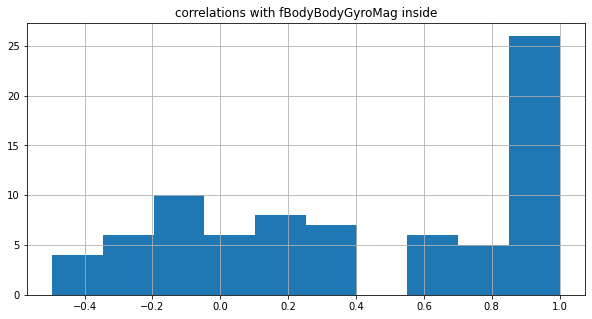

In [432]:
body_correlation_plot('fBodyBodyGyroMag')

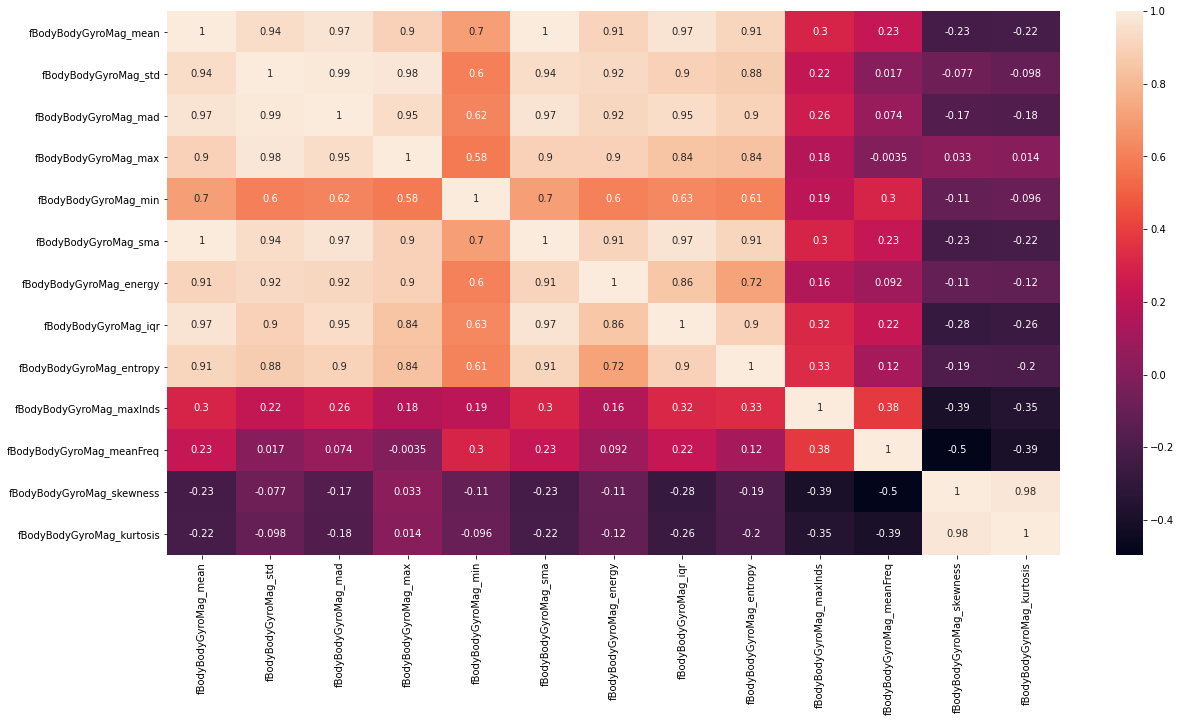

In [475]:
body_correlation_matrix('fBodyBodyGyroMag', '')

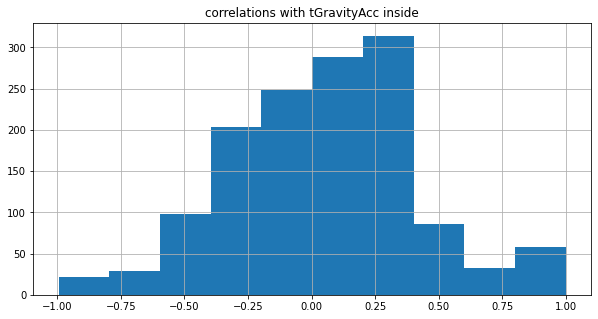

In [362]:
body_correlation_plot('tGravityAcc', True)

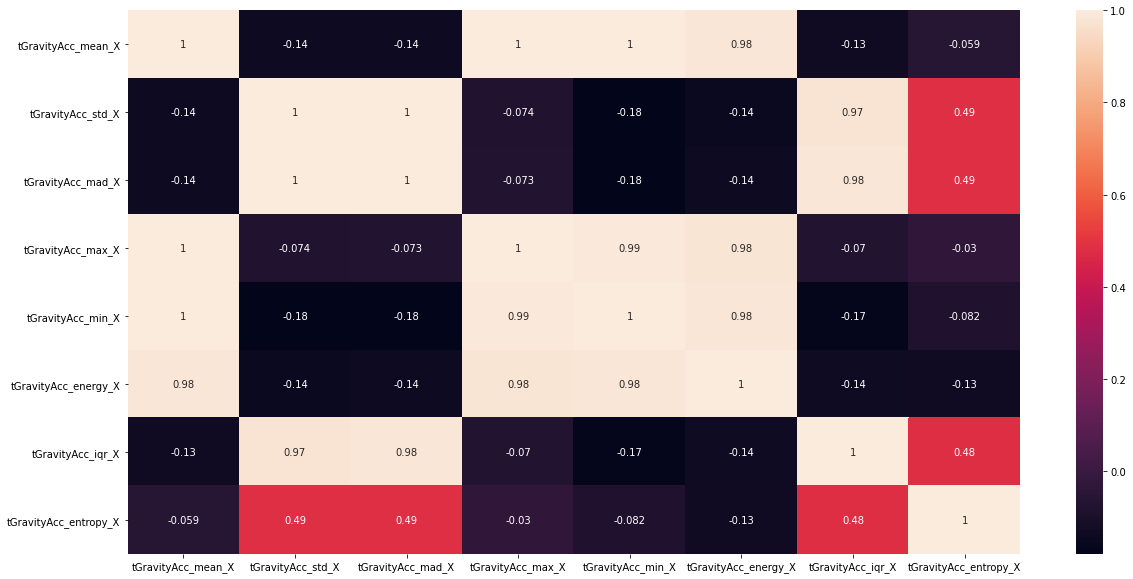

In [430]:
body_correlation_matrix('tGravityAcc', 'X')

Spróbujmy teraz sprawdzić jak wyglądają zależności w zmiennych, kótre zaczynają się na 't' i kończą na 'X': 

In [330]:
t_corr = correlation[(correlation[0].str[0] == 't') & 
                     (correlation[1].str[0] == 't') & 
                     (correlation[0].str[-1] == 'X') & 
                     (correlation[1].str[-1] == 'X')].reset_index(drop=True)
print(t_corr.shape[0])
t_corr.head()

780


,0,1,2
0,tBodyAcc_mean_X,tBodyAcc_std_X,0.004590
1,tBodyAcc_mean_X,tBodyAcc_mad_X,0.010303
2,tBodyAcc_mean_X,tBodyAcc_max_X,0.046943
3,tBodyAcc_mean_X,tBodyAcc_min_X,0.075945
4,tBodyAcc_mean_X,tBodyAcc_energy_X,0.022322


In [483]:
# Wyświetlmy wszystkie zmienne, które otrzymały wyniki lepsze niż 0.9. 
df = t_corr[(t_corr[2]>0.9) | (t_corr[2]<-0.9)].reset_index(drop=True)
np.unique([np.hstack((np.unique(df[0]), np.unique(df[1])))])

array(['tBodyAccJerk_energy_X', 'tBodyAccJerk_entropy_X',
       'tBodyAccJerk_iqr_X', 'tBodyAccJerk_mad_X', 'tBodyAccJerk_max_X',
       'tBodyAccJerk_min_X', 'tBodyAccJerk_std_X', 'tBodyAcc_energy_X',
       'tBodyAcc_iqr_X', 'tBodyAcc_mad_X', 'tBodyAcc_max_X',
       'tBodyAcc_min_X', 'tBodyAcc_std_X', 'tBodyGyroJerk_energy_X',
       'tBodyGyroJerk_entropy_X', 'tBodyGyroJerk_iqr_X',
       'tBodyGyroJerk_mad_X', 'tBodyGyroJerk_max_X',
       'tBodyGyroJerk_min_X', 'tBodyGyroJerk_std_X', 'tBodyGyro_energy_X',
       'tBodyGyro_iqr_X', 'tBodyGyro_mad_X', 'tBodyGyro_max_X',
       'tBodyGyro_min_X', 'tBodyGyro_std_X', 'tGravityAcc_energy_X',
       'tGravityAcc_iqr_X', 'tGravityAcc_mad_X', 'tGravityAcc_max_X',
       'tGravityAcc_mean_X', 'tGravityAcc_min_X', 'tGravityAcc_std_X'],
      dtype=object)

Możemy zauważyć, że kawałki zmiennych się powtarzają, tak jak: 'tBodyAccJerk', 'tBodyAcc', 'tBodyGyro' itp. 

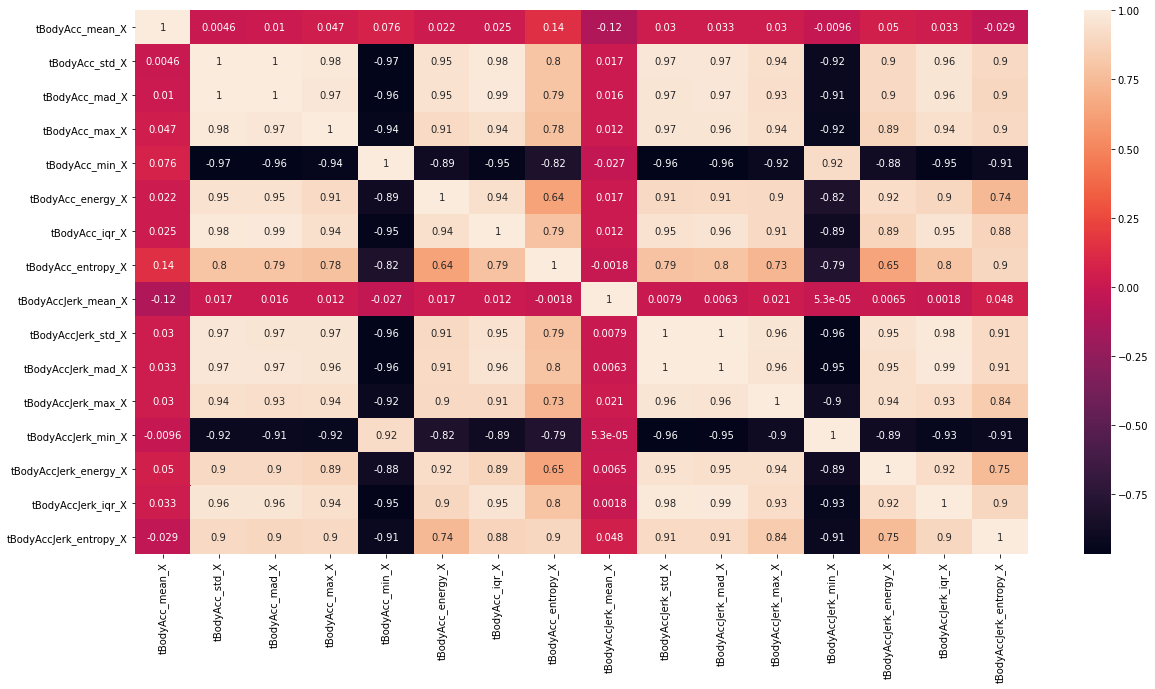

In [489]:
# Spróbujmy wyswietlić zależności między przykładową zmienną 
body_correlation_matrix('tBodyAcc', 'X')

## Dalsze kroki
- reduckja wymiarów
- wstępne modele